# WQU Msc Financial Engineering Financial Data GWP 1

### Money at a fixed rate for an unsecured purchase: 

Datasets to obtain: 
1. Credit Card Default Rates in the US for the past 8 years.
2. Interest Rates in the US for the past 8 years.
3. Unemployment rates in the US for the past 8 years.

In [43]:
#import dependencies 
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.


### Fetch The Data:

Since the credit default data is not available on Yahoo Finance, we will download the datasets using Pandas Datareader, using the FRED API. 

In [30]:
#import the credit default data: 

# Define the date range
start = datetime(2016, 1, 1)
end = datetime.now()

# Fetch the delinquency rate on credit cards
credit_card_defaults_df = web.DataReader('DRCCLACBS', 'fred', start, end)

credit_card_defaults_df.reset_index(inplace=True)
credit_card_defaults_df


,DATE,DRCCLACBS
0,2016-01-01,2.14
1,2016-04-01,2.21
2,2016-07-01,2.30
3,2016-10-01,2.37
4,2017-01-01,2.39
5,2017-04-01,2.48
6,2017-07-01,2.55
7,2017-10-01,2.49
8,2018-01-01,2.48
9,2018-04-01,2.49


In [25]:
# Fetch the The Bank Prime Lending Rate from FRED:

# Define the date range, shift dates to align with default quarters
start = datetime(2015, 10, 1)
end = datetime.now()

# Fetch the delinquency rate on credit cards
bank_prime_rates_df = web.DataReader('DPRIME', 'fred', start, end)

#resample the data to quarterly 

bank_prime_rates_df = bank_prime_rates_df.resample('Q').mean()


bank_prime_rates_df.reset_index(inplace=True)

#drop the last two rows to align with the default rate data
bank_prime_rates_df = bank_prime_rates_df.drop(bank_prime_rates_df.index[-2:])
bank_prime_rates_df

,DATE,DPRIME
0,2015-12-31,3.290323
1,2016-03-31,3.500000
2,2016-06-30,3.500000
3,2016-09-30,3.500000
4,2016-12-31,3.545082
5,2017-03-31,3.798387
6,2017-06-30,4.046154
7,2017-09-30,4.250000
8,2017-12-31,4.294355
9,2018-03-31,4.528226


In [26]:
# Fetch the Unemployment in The US Rate from FRED:

# Define the date range, shift dates to align with default quarters
start = datetime(2015, 10, 1)
end = datetime.now()

# Fetch the delinquency rate on credit cards
unemployment_df = web.DataReader('UNRATE', 'fred', start, end)

#resample the data to quarterly 

unemployment_df = unemployment_df.resample('Q').mean()

unemployment_df.reset_index(inplace=True)

#drop the last two rows to align with the credit defaults data
unemployment_df = unemployment_df.drop(unemployment_df.index[-2:])
unemployment_df



,DATE,UNRATE
0,2015-12-31,5.033333
1,2016-03-31,4.900000
2,2016-06-30,4.933333
3,2016-09-30,4.900000
4,2016-12-31,4.766667
5,2017-03-31,4.566667
6,2017-06-30,4.366667
7,2017-09-30,4.333333
8,2017-12-31,4.166667
9,2018-03-31,4.033333


In [34]:
#combine the three dataframes into one dataframe for analysis

combined_df = credit_card_defaults_df.copy()
combined_df.rename(columns={'DRCCLACBS': 'credit_default_rate'}, inplace=True)
combined_df['interest_rate'] = bank_prime_rates_df['DPRIME']
combined_df['unemployment_rate'] = unemployment_df['UNRATE']
combined_df

,DATE,credit_default_rate,interest_rate,unemployment_rate
0,2016-01-01,2.14,3.290323,5.033333
1,2016-04-01,2.21,3.500000,4.900000
2,2016-07-01,2.30,3.500000,4.933333
3,2016-10-01,2.37,3.500000,4.900000
4,2017-01-01,2.39,3.545082,4.766667
5,2017-04-01,2.48,3.798387,4.566667
6,2017-07-01,2.55,4.046154,4.366667
7,2017-10-01,2.49,4.250000,4.333333
8,2018-01-01,2.48,4.294355,4.166667
9,2018-04-01,2.49,4.528226,4.033333


### Analyze the Data:

In [40]:
combined_df.describe()

,DATE,credit_default_rate,interest_rate,unemployment_rate
count,34,34.000000,34.000000,34.000000
mean,2020-02-15 06:21:10.588235264,2.370000,4.774223,4.671569
min,2016-01-01 00:00:00,1.540000,3.250000,3.500000
25%,2018-01-23 12:00:00,2.117500,3.345766,3.708333
50%,2020-02-15 12:00:00,2.465000,4.272177,3.983333
75%,2022-03-09 12:00:00,2.580000,5.356731,4.900000
max,2024-04-01 00:00:00,3.250000,8.500000,13.000000
std,NaN,0.433037,1.716763,1.847323


#### 1. Credit Default Rates:

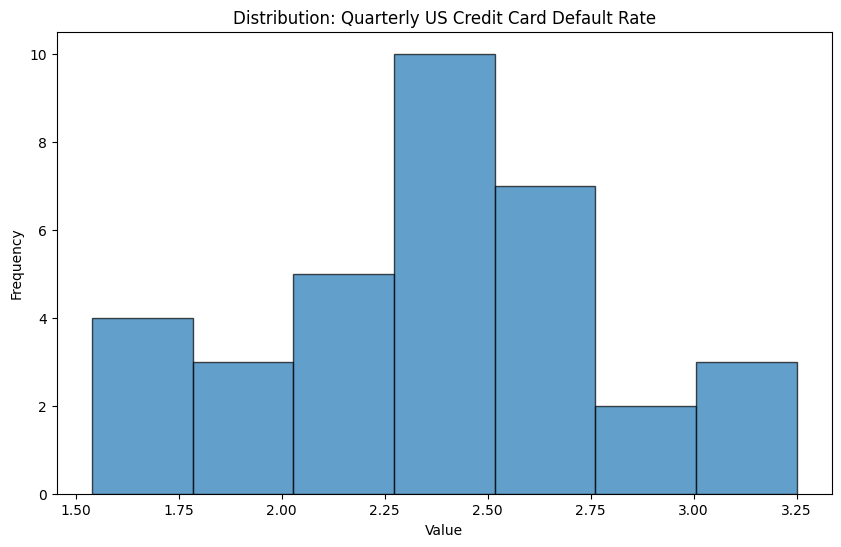

In [55]:
# Analyze the distribution of the credit default rates

plt.figure(figsize=(10, 6))
plt.hist(combined_df['credit_default_rate'], bins=7, edgecolor='black', alpha=0.7)
plt.title('Distribution: Quarterly US Credit Card Default Rate')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.grid(visible=False)
plt.show()

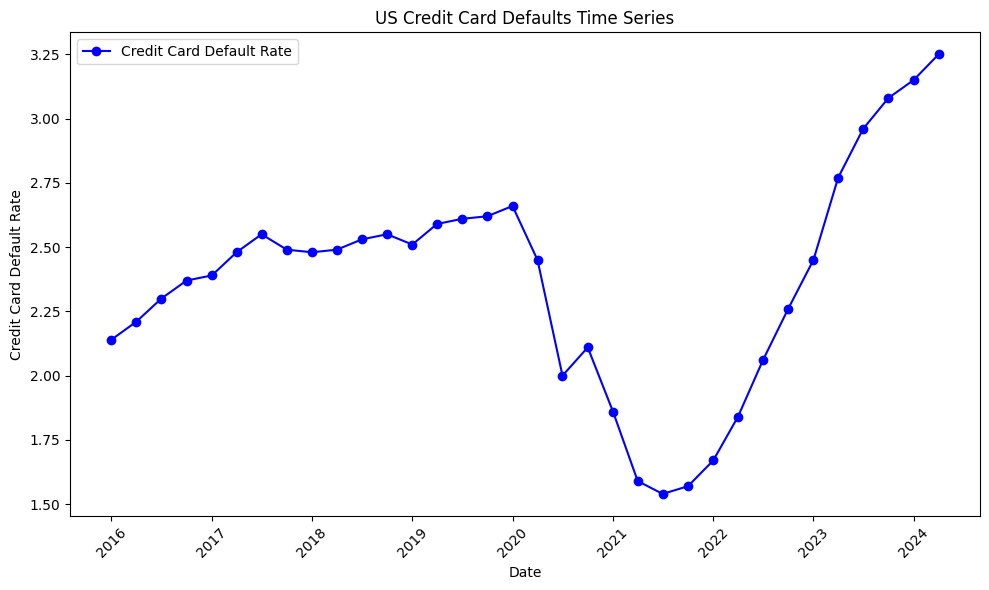

In [62]:
# Analyze the US credit card default rates over time: 

# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(combined_df.DATE, combined_df['credit_default_rate'], marker='o', color='blue', label='Credit Card Default Rate')

# Add titles and labels
plt.title('US Credit Card Defaults Time Series')
plt.xlabel('Date')
plt.ylabel('Credit Card Default Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(visible=False)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

#### 2. US Prime Lending Rates :

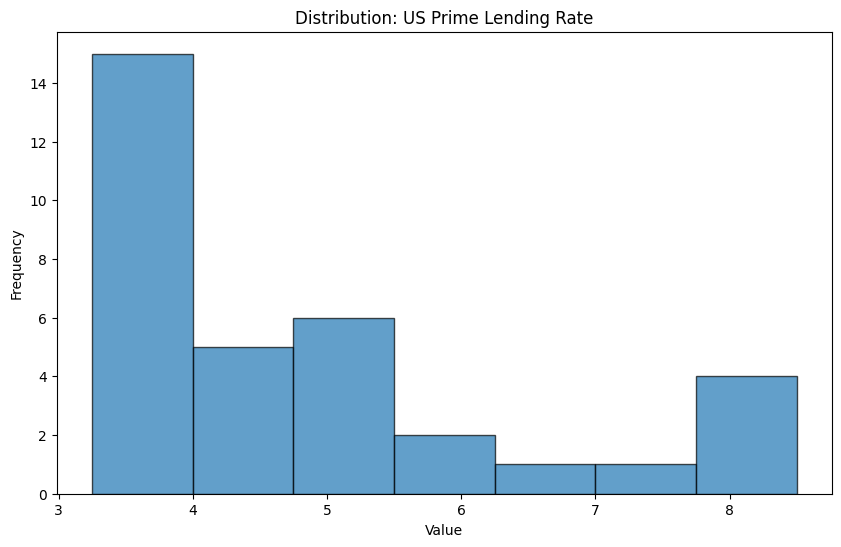

In [64]:
#Analyze the distribution of the US Prime Lending Rate per quarter 

plt.figure(figsize=(10, 6))
plt.hist(combined_df['interest_rate'], bins=7, edgecolor='black', alpha=0.7)
plt.title('Distribution: US Prime Lending Rate')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.grid(visible=False)
plt.show()

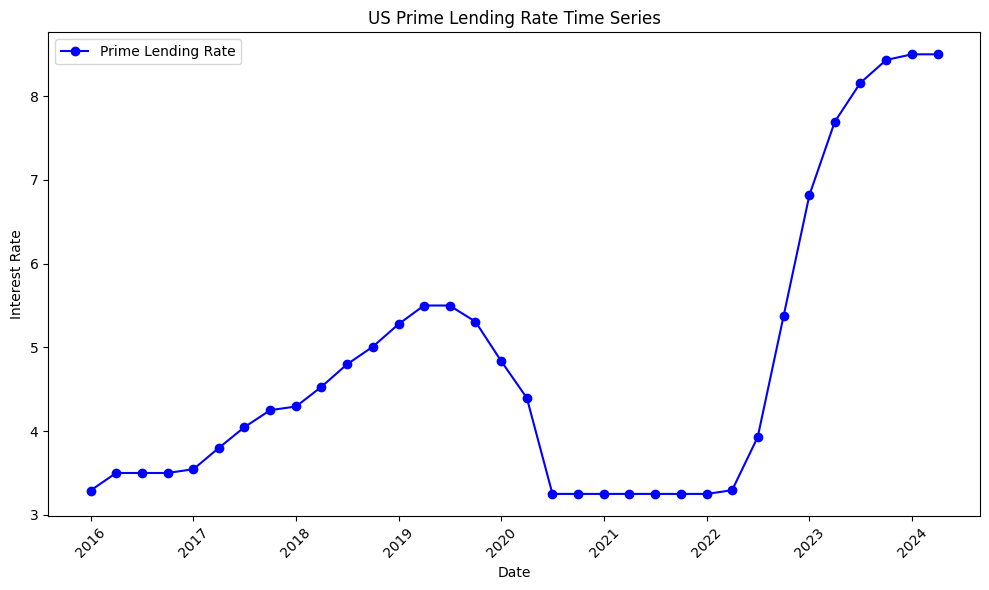

In [66]:
# Analyze the US prime lending rate over time: 

# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(combined_df.DATE, combined_df['interest_rate'], marker='o', color='blue', label='Prime Lending Rate')

# Add titles and labels
plt.title('US Prime Lending Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(visible=False)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()